### Compare the nnU-Net predictions and the VESPIR images with the ground truth (thresholded PET)

In [42]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import SimpleITK as sitk
import json
from os.path import expanduser
import nibabel as nib

#### load the test set patient IDs

In [43]:
TRAINING_SET_ID = 140
TEST_PATIENT_IDX = 0

In [44]:
with open('{}/patient-mapping-Dataset{}_RNSH_HFlung.json'.format(expanduser('~'), TRAINING_SET_ID)) as f:
    patient_mapping = json.load(f)

In [45]:
test_patient = patient_mapping['test'][TEST_PATIENT_IDX]

In [46]:
test_patient_id = int(test_patient[0].split('/')[-1].split('.')[0][-2:])
test_patient_id

20

In [56]:
### temporary - for testing only
TRAINING_SET_ID = 138
TEST_PATIENT_IDX = 0
test_patient_id = 17

#### load the pre-processing stack

In [57]:
f = '/mnt/data-ssd-4t/datasets/RNSH_HFlung/training-set/Patient{:02d}.npy'.format(test_patient_id)
patient_arr = np.load(f)
patient_arr = np.moveaxis(patient_arr, 1, -1)  # move the z-axis to be last

In [73]:
exh_img = patient_arr[0]
inh_img = patient_arr[1]
pet_img = patient_arr[2]
exh_img.shape, inh_img.shape, pet_img.shape

((304, 304, 250), (304, 304, 250), (304, 304, 250))

In [74]:
label_img = nib.load('/mnt/data-ssd-4t/datasets/RNSH_HFlung/nnU-Net-processing/nnUNet_raw/Dataset{}_RNSH_HFlung/labelsTs/RNSH_HFlung_{:04d}.nii.gz'.format(TRAINING_SET_ID, TEST_PATIENT_IDX)).get_fdata()
label_img.shape

(304, 304, 250)

#### load the VESPIR output

In [67]:
f = '/mnt/data-ssd-4t/datasets/RNSH_HFlung/VESPIR-output/Patient{:02d}/VentFinal_DIR-HU.mha'.format(test_patient_id)
vespir_img = sitk.GetArrayFromImage(sitk.ReadImage(f))

In [69]:
vespir_img.shape

(84, 512, 512)

#### load the predictions

In [61]:
prediction_img = nib.load('/mnt/data-ssd-4t/datasets/RNSH_HFlung/nnU-Net-processing/nnUNet_predictions/Dataset{}_RNSH_HFlung/hist-post/RNSH_HFlung_{:04d}.nii.gz'.format(TRAINING_SET_ID, TEST_PATIENT_IDX)).get_fdata()

In [70]:
prediction_img.shape

(304, 304, 250)

#### display

In [63]:
DISPLAY_IDX = 100

IndexError: index 100 is outside the extent for dimension 2 with size 84

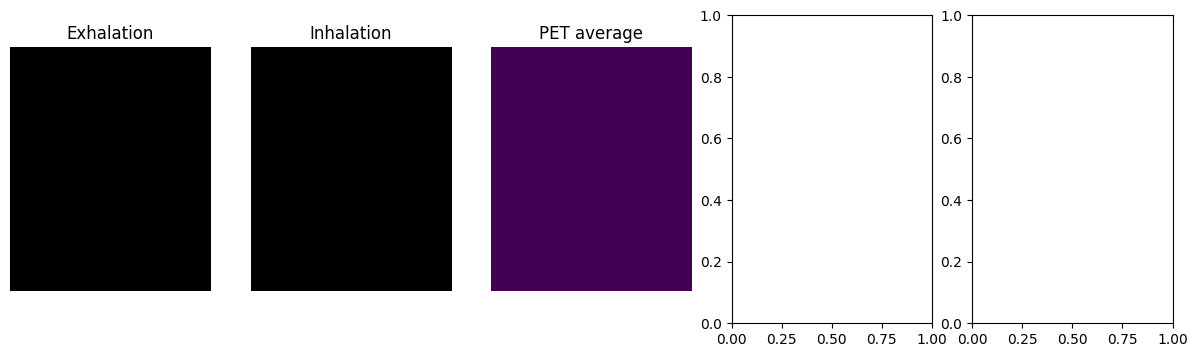

In [65]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15,4))
ax1.imshow(exh_img[DISPLAY_IDX], cmap="gray")
ax1.set_title('Exhalation')
ax1.set_axis_off()

ax2.imshow(inh_img[DISPLAY_IDX], cmap="gray")
ax2.set_title('Inhalation')
ax2.set_axis_off()

ax3.imshow(pet_img[DISPLAY_IDX])
ax3.set_title('PET average')
ax3.set_axis_off()

ax4.imshow(vespir_img[:,:,DISPLAY_IDX])
ax4.set_title('VESPIR')
ax4.set_axis_off()

ax5.imshow(prediction_img[:,:,DISPLAY_IDX])
ax5.set_title('Prediction')
ax5.set_axis_off()

fig.suptitle('Patient ID {}'.format(test_patient_id), x=0.1, y=1.0, fontsize=12, ha='left')

fig.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.01, 
                    hspace=0.1)